# Inverse scattering for circular billiard

## Importação das bibliotecas

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import utils.Utils as utils
import utils.GenerateData as generateData
import model.GeneralizedMLP as gMLP

## Lendo os dados

In [2]:
df = pd.read_csv('./data/dados.csv')

In [3]:
df

,M,HBAR,k_min,k_max,delta_k,n_min,n_max,gamma,R,l_k1,...,l_k587,l_k588,l_k589,l_k590,l_k591,l_k592,l_k593,l_k594,l_k595,l_k596
0,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,0.1,0.100000,0.155397,...,0.001165,0.001162,0.001160,0.001158,0.001156,0.001154,0.001151,0.001149,0.001147,0.001145
1,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,0.1,0.110053,0.184685,...,0.001384,0.001382,0.001379,0.001376,0.001374,0.001371,0.001368,0.001366,0.001363,0.001360
2,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,0.1,0.120106,0.215951,...,0.001616,0.001613,0.001610,0.001607,0.001603,0.001600,0.001597,0.001594,0.001591,0.001587
3,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,0.1,0.130159,0.249095,...,0.001859,0.001855,0.001851,0.001847,0.001843,0.001839,0.001836,0.001832,0.001828,0.001824
4,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,0.1,0.140212,0.284026,...,0.002109,0.002105,0.002100,0.002096,0.002091,0.002087,0.002082,0.002078,0.002073,0.002069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55095,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,3.0,1.959788,34.509730,...,9.570126,9.597571,9.622035,9.642763,9.658887,9.669430,9.673316,9.669396,9.656485,9.633432
55096,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,3.0,1.969841,34.602123,...,9.705567,9.723303,9.735533,9.741150,9.738963,9.727735,9.706246,9.673381,9.628239,9.570257
55097,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,3.0,1.979894,34.694353,...,9.808430,9.808259,9.799045,9.779501,9.748425,9.704819,9.648019,9.577836,9.494682,9.399662
55098,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,3.0,1.989947,34.786420,...,9.853002,9.824148,9.782554,9.727437,9.658485,9.576006,9.481020,9.375310,9.261361,9.142220


## Plot da scattering cross length para gamma, R = 2.0

In [4]:
df_R_2 = df[df['R'] == 2.0]

In [5]:
row_gamma_R_2 = df_R_2[(df_R_2['gamma'] > 1.97) & (df_R_2['gamma'] < 2.03)]

In [6]:
row_gamma_R_2

,M,HBAR,k_min,k_max,delta_k,n_min,n_max,gamma,R,l_k1,...,l_k587,l_k588,l_k589,l_k590,l_k591,l_k592,l_k593,l_k594,l_k595,l_k596
35719,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,1.976471,2.0,34.160977,...,6.956875,6.919069,6.885087,6.855019,6.828886,6.806644,6.788192,6.773382,6.762030,6.753920
35909,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,1.986505,2.0,34.171447,...,6.987403,6.948690,6.913837,6.882948,6.856052,6.833113,6.814034,6.798671,6.786840,6.778324
36099,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,1.996540,2.0,34.181816,...,7.017881,6.978250,6.942513,6.910788,6.883115,6.859463,6.839742,6.823812,6.811488,6.802554
36289,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,2.006574,2.0,34.192086,...,7.048311,7.007750,6.971118,6.938543,6.910077,6.885697,6.865320,6.848808,6.835977,6.826611
36479,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,2.016609,2.0,34.202258,...,7.078696,7.037195,6.999654,6.966216,6.936942,6.911820,6.890772,6.873662,6.860311,6.850500
36669,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,2.026644,2.0,34.212333,...,7.109038,7.066588,7.028126,6.993810,6.963714,6.937834,6.916099,6.898378,6.884491,6.874222


In [7]:
l_array = row_gamma_R_2.drop(columns=['M', 'HBAR', 'k_min', 'k_max', 'delta_k', 'n_min', 'n_max', 'gamma', 'R']).to_numpy()

In [8]:
l_array.shape

(6, 596)

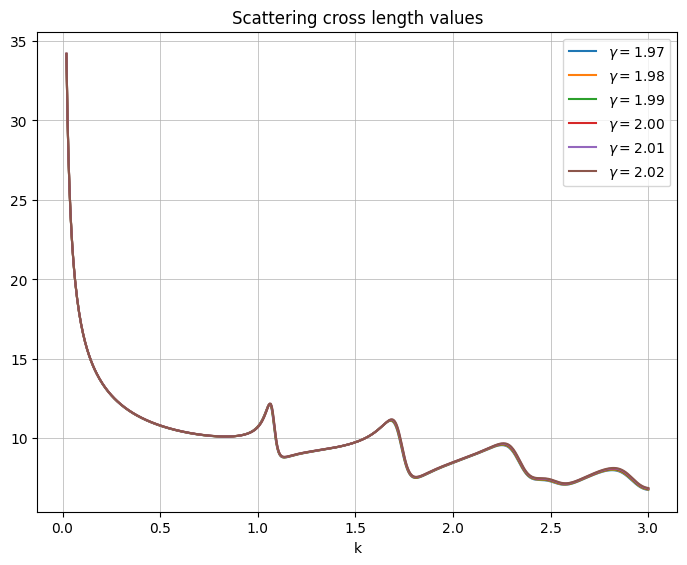

In [9]:
k_min = 0.02
k_max = 3.0
k = np.linspace(k_min, k_max, 596)

fig = plt.figure(figsize=(8,6))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(k, l_array[0], ls='-', label=f"$\gamma = 1.97$")
axes.plot(k, l_array[1], ls='-', label=f"$\gamma = 1.98$")
axes.plot(k, l_array[2], ls='-', label=f"$\gamma = 1.99$")
axes.plot(k, l_array[3], ls='-', label=f"$\gamma = 2.00$")
axes.plot(k, l_array[4], ls='-', label=f"$\gamma = 2.01$")
axes.plot(k, l_array[5], ls='-', label=f"$\gamma = 2.02$")
axes.set_title(f'Scattering cross length values')
axes.set_xlabel(f'k')
axes.legend(loc='upper right')
plt.grid(linestyle='-', linewidth=0.5)

## Implementação da rede neural

### Definição dos inputs da rede

In [10]:
features = df.drop(columns=['gamma', 'R'])

features = features.to_numpy()

In [11]:
targets = df[['gamma', 'R']]

targets = targets.to_numpy()

In [12]:
print(features.shape)
print(targets.shape)

(55100, 603)
(55100, 2)


### Definição da rede neural

A rede neural implementada é uma rede neural do tipo Multilayer Perceptron

### Variáveis para o modelo, separação dos dados de teste e treino e etc

In [13]:
train, test_data = train_test_split(features, test_size = 0.2, random_state = 2)
real_train_data, validation_data = train_test_split(train, test_size = 0.3, random_state = 2)

train_target, test_target = train_test_split(targets, test_size = 0.2, random_state = 2)
real_train_target, validation_target = train_test_split(train_target, test_size = 0.3, random_state = 2)

input_size = 603
output_size = 2
batch_size = 32
num_epochs = 150
learning_rate = 0.0001

In [14]:
train_loader, val_loader, test_loader = utils.prepare_data(real_train_data, real_train_target, test_data, test_target, validation_data, validation_target, batch_size)

Input Shapes:
torch.Size([30856, 603]) torch.Size([13224, 603]) torch.Size([11020, 603])
Target Shapes:
torch.Size([30856, 2]) torch.Size([13224, 2]) torch.Size([11020, 2])


### Primeira rodada de treinamento

In [15]:
# nums_neurons = [20, 40, 60, 80, 100, 140, 180, 220, 260, 300, 340, 380, 420]

# for num in nums_neurons:
    
model = gMLP.GeneralizedMLP(input_size, output_size, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train and evaluate the model
running_loss_array, val_loss_array = gMLP.train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs)
gMLP.evaluate_model(model, criterion, test_loader)

torch.save(model.state_dict(), 'mlp_weights.pth')

hidden neurons:  404
Epoch 1/150, Training Loss: 0.07391260342112708, Validation Loss: 0.03216970062382735
Epoch 2/150, Training Loss: 0.029509055346293965, Validation Loss: 0.02478753540277985
Epoch 3/150, Training Loss: 0.024549706105065624, Validation Loss: 0.021467931704159268
Epoch 4/150, Training Loss: 0.0218685238670384, Validation Loss: 0.019337223252227555
Epoch 5/150, Training Loss: 0.020249173268096745, Validation Loss: 0.01758006441458646
Epoch 6/150, Training Loss: 0.018948727450936724, Validation Loss: 0.017606778342528762
Epoch 7/150, Training Loss: 0.017861790085751852, Validation Loss: 0.017833456336880545
Epoch 8/150, Training Loss: 0.016829494581861816, Validation Loss: 0.01484646789610368
Epoch 9/150, Training Loss: 0.016005727103694193, Validation Loss: 0.014002059954713472
Epoch 10/150, Training Loss: 0.015335519905226217, Validation Loss: 0.013905092807270694
Epoch 11/150, Training Loss: 0.01470526212203881, Validation Loss: 0.013049553187534771
Epoch 12/150, Tra

### Segunda rodada de treinamento

In [16]:
saved_state_dict = torch.load('mlp_weights.pth')

# Initialize the new model
extended_model = gMLP.GeneralizedMLP(input_size, output_size, 2)

# Copy the weights of the hidden_layer to hidden_layer1

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
gMLP.train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
gMLP.evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')

hidden neurons:  404
Epoch 1/150, Training Loss: 0.08563365791103962, Validation Loss: 0.015307511965595726
Epoch 2/150, Training Loss: 0.013585714486890854, Validation Loss: 0.010868530736219335
Epoch 3/150, Training Loss: 0.01061955062163405, Validation Loss: 0.008749406299709031
Epoch 4/150, Training Loss: 0.009259789777796599, Validation Loss: 0.007755003632484949
Epoch 5/150, Training Loss: 0.008258678430662409, Validation Loss: 0.007241143809590974
Epoch 6/150, Training Loss: 0.007579104715645786, Validation Loss: 0.006804600198711561
Epoch 7/150, Training Loss: 0.007052850917915432, Validation Loss: 0.006695743141513642
Epoch 8/150, Training Loss: 0.006755749818415337, Validation Loss: 0.00788097966750319
Epoch 9/150, Training Loss: 0.006427534626539884, Validation Loss: 0.006077230596973376
Epoch 10/150, Training Loss: 0.00607553183775482, Validation Loss: 0.005273389516838102
Epoch 11/150, Training Loss: 0.005763258128740627, Validation Loss: 0.004989047585800965
Epoch 12/150,

### Terceira rodada de treinamento

In [17]:
saved_state_dict = torch.load('generalized_mlp_weights.pth')

extended_model = gMLP.GeneralizedMLP(input_size, output_size, 3)

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

for i in range(1, 2):
    extended_model.hidden_layers[i].load_state_dict({
        'weight': saved_state_dict[f'hidden_layers.{i}.weight'],
        'bias': saved_state_dict[f'hidden_layers.{i}.bias']
})

criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
gMLP.train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
gMLP.evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')


hidden neurons:  404
Epoch 1/150, Training Loss: 0.07512264275281579, Validation Loss: 0.003228273302325664
Epoch 2/150, Training Loss: 0.0027586688847616413, Validation Loss: 0.0017902500987764906
Epoch 3/150, Training Loss: 0.0018293101205870538, Validation Loss: 0.0013019801711507259
Epoch 4/150, Training Loss: 0.0014608641475658633, Validation Loss: 0.0014834144802405253
Epoch 5/150, Training Loss: 0.0012547767774498699, Validation Loss: 0.001100822484808533
Epoch 6/150, Training Loss: 0.0011276215230343366, Validation Loss: 0.0008574873686330573
Epoch 7/150, Training Loss: 0.0011253473616429541, Validation Loss: 0.0007857571158879819
Epoch 8/150, Training Loss: 0.0009898382989259032, Validation Loss: 0.0014402941048594084
Epoch 9/150, Training Loss: 0.0009291369351633786, Validation Loss: 0.0009391845248681482
Epoch 10/150, Training Loss: 0.0009166547375184682, Validation Loss: 0.0007318926247254077
Epoch 11/150, Training Loss: 0.0008609502297920209, Validation Loss: 0.00076880989

#### Quarta rodada de treinamento

In [18]:
saved_state_dict = torch.load('generalized_mlp_weights.pth')

extended_model = gMLP.GeneralizedMLP(input_size, output_size, 4)

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

for i in range(1, 3):
    extended_model.hidden_layers[i].load_state_dict({
        'weight': saved_state_dict[f'hidden_layers.{i}.weight'],
        'bias': saved_state_dict[f'hidden_layers.{i}.bias']
})
    
criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
gMLP.train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
gMLP.evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')

hidden neurons:  404
Epoch 1/150, Training Loss: 0.07855619854297383, Validation Loss: 0.001970763757328867
Epoch 2/150, Training Loss: 0.001488749566126055, Validation Loss: 0.0009989066757438907
Epoch 3/150, Training Loss: 0.0010102810149869418, Validation Loss: 0.0007659665832691376
Epoch 4/150, Training Loss: 0.0008929835572275406, Validation Loss: 0.0009838852122499707
Epoch 5/150, Training Loss: 0.0007461716921896302, Validation Loss: 0.0006554459847955839
Epoch 6/150, Training Loss: 0.0007209154355826479, Validation Loss: 0.0008072307321082987
Epoch 7/150, Training Loss: 0.000696586909866168, Validation Loss: 0.0015010705786017062
Epoch 8/150, Training Loss: 0.0006293010720597107, Validation Loss: 0.00044718678109699315
Epoch 9/150, Training Loss: 0.0006208157832306023, Validation Loss: 0.0008401471512265062
Epoch 10/150, Training Loss: 0.000648377101278473, Validation Loss: 0.0005886588041903451
Epoch 11/150, Training Loss: 0.0005879760414622532, Validation Loss: 0.000485619822

### Quinta rodada

In [19]:
saved_state_dict = torch.load('generalized_mlp_weights.pth')

extended_model = gMLP.GeneralizedMLP(input_size, output_size, 5)

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

for i in range(1, 4):
    extended_model.hidden_layers[i].load_state_dict({
        'weight': saved_state_dict[f'hidden_layers.{i}.weight'],
        'bias': saved_state_dict[f'hidden_layers.{i}.bias']
})
    
criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
gMLP.train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
gMLP.evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')

hidden neurons:  404
Epoch 1/150, Training Loss: 0.07289277732897359, Validation Loss: 0.001243368263023451
Epoch 2/150, Training Loss: 0.000761937620602319, Validation Loss: 0.0007189920642466627
Epoch 3/150, Training Loss: 0.0005868475293376304, Validation Loss: 0.0005566775399498678
Epoch 4/150, Training Loss: 0.0005656123881975015, Validation Loss: 0.0005362093026000682
Epoch 5/150, Training Loss: 0.0005783146926608429, Validation Loss: 0.0003246190521308189
Epoch 6/150, Training Loss: 0.00044490207266243456, Validation Loss: 0.00036047351620259026
Epoch 7/150, Training Loss: 0.000466082987621055, Validation Loss: 0.0003412397498604313
Epoch 8/150, Training Loss: 0.0005388755030635084, Validation Loss: 0.0003866441274758604
Epoch 9/150, Training Loss: 0.00041643393894677397, Validation Loss: 0.0008565707350569296
Epoch 10/150, Training Loss: 0.0004244236922850036, Validation Loss: 0.0003128077922613025
Epoch 11/150, Training Loss: 0.0004374844109708289, Validation Loss: 0.000255248

#### Sexta rodada

In [20]:
saved_state_dict = torch.load('generalized_mlp_weights.pth')

extended_model = gMLP.GeneralizedMLP(input_size, output_size, 6)

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

for i in range(1, 5):
    extended_model.hidden_layers[i].load_state_dict({
        'weight': saved_state_dict[f'hidden_layers.{i}.weight'],
        'bias': saved_state_dict[f'hidden_layers.{i}.bias']
})
    
criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
gMLP.train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
gMLP.evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')

hidden neurons:  404
Epoch 1/150, Training Loss: 0.05104203390095074, Validation Loss: 0.00047844612238009726
Epoch 2/150, Training Loss: 0.0005104522637518032, Validation Loss: 0.00043851835491497896
Epoch 3/150, Training Loss: 0.00043974478737815464, Validation Loss: 0.00031715493862180305
Epoch 4/150, Training Loss: 0.0004161142259688416, Validation Loss: 0.00037534429552820895
Epoch 5/150, Training Loss: 0.0004354638833037024, Validation Loss: 0.0002806102926062548
Epoch 6/150, Training Loss: 0.00045334840164890203, Validation Loss: 0.0003392284937690244
Epoch 7/150, Training Loss: 0.00035422357036222444, Validation Loss: 0.0002552799812648395
Epoch 8/150, Training Loss: 0.0004434355412656019, Validation Loss: 0.00031293278746616213
Epoch 9/150, Training Loss: 0.00035326455485581185, Validation Loss: 0.00031802379326021204
Epoch 10/150, Training Loss: 0.00036301078028142105, Validation Loss: 0.00034699159711464375
Epoch 11/150, Training Loss: 0.00040387415386017994, Validation Loss

### Sétima rodada

In [21]:
saved_state_dict = torch.load('generalized_mlp_weights.pth')

extended_model = gMLP.GeneralizedMLP(input_size, output_size, 7)

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

for i in range(1, 6):
    extended_model.hidden_layers[i].load_state_dict({
        'weight': saved_state_dict[f'hidden_layers.{i}.weight'],
        'bias': saved_state_dict[f'hidden_layers.{i}.bias']
})
    
criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
gMLP.train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
gMLP.evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')

hidden neurons:  404
Epoch 1/150, Training Loss: 0.06524505919078365, Validation Loss: 0.0006086540462633095
Epoch 2/150, Training Loss: 0.0005160903548710218, Validation Loss: 0.0003513303320111981
Epoch 3/150, Training Loss: 0.0004582750925569858, Validation Loss: 0.000356938906942898
Epoch 4/150, Training Loss: 0.00037163808511164753, Validation Loss: 0.00023227245420690486
Epoch 5/150, Training Loss: 0.000397814285193167, Validation Loss: 0.0002005280655504211
Epoch 6/150, Training Loss: 0.00046463955066409904, Validation Loss: 0.0005242260287761585
Epoch 7/150, Training Loss: 0.000334405219597818, Validation Loss: 0.0001508351292943479
Epoch 8/150, Training Loss: 0.0003978009557594555, Validation Loss: 0.00021748831493709436
Epoch 9/150, Training Loss: 0.00036326309054103133, Validation Loss: 0.00042965632145870074
Epoch 10/150, Training Loss: 0.00040030399619929197, Validation Loss: 0.00025165707810132615
Epoch 11/150, Training Loss: 0.0003760899411145853, Validation Loss: 0.0002

### Oitava rodada

In [22]:
saved_state_dict = torch.load('generalized_mlp_weights.pth')

extended_model = gMLP.GeneralizedMLP(input_size, output_size, 8)

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

for i in range(1, 7):
    extended_model.hidden_layers[i].load_state_dict({
        'weight': saved_state_dict[f'hidden_layers.{i}.weight'],
        'bias': saved_state_dict[f'hidden_layers.{i}.bias']
})
    
criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
gMLP.train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
gMLP.evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')

hidden neurons:  404
Epoch 1/150, Training Loss: 0.071414568544959, Validation Loss: 0.0005171419524701294
Epoch 2/150, Training Loss: 0.0004906583483297127, Validation Loss: 0.00034945997972477786
Epoch 3/150, Training Loss: 0.00042246115134414913, Validation Loss: 0.0003720856919349846
Epoch 4/150, Training Loss: 0.00046311052678737406, Validation Loss: 0.00022201467552382593
Epoch 5/150, Training Loss: 0.00034836030187003237, Validation Loss: 0.00018057784479209009
Epoch 6/150, Training Loss: 0.00038003529633628806, Validation Loss: 0.0005618837348999262
Epoch 7/150, Training Loss: 0.0003890316505695348, Validation Loss: 0.0006900504865550891
Epoch 8/150, Training Loss: 0.00038808115807463235, Validation Loss: 0.0003254356024494948
Epoch 9/150, Training Loss: 0.00036945652858012747, Validation Loss: 0.00034900754948519506
Epoch 10/150, Training Loss: 0.0004083575263596502, Validation Loss: 0.000457145833828743
Epoch 11/150, Training Loss: 0.00036647443336822514, Validation Loss: 0.0

#### Nona rodada

In [23]:
saved_state_dict = torch.load('generalized_mlp_weights.pth')

extended_model = gMLP.GeneralizedMLP(input_size, output_size, 9)

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

for i in range(1, 8):
    extended_model.hidden_layers[i].load_state_dict({
        'weight': saved_state_dict[f'hidden_layers.{i}.weight'],
        'bias': saved_state_dict[f'hidden_layers.{i}.bias']
})
    
criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
gMLP.train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
gMLP.evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')

hidden neurons:  404
Epoch 1/150, Training Loss: 0.09774368888046472, Validation Loss: 0.0015460502876223016
Epoch 2/150, Training Loss: 0.0008746095334355831, Validation Loss: 0.0010703377325002302
Epoch 3/150, Training Loss: 0.0005631696267102946, Validation Loss: 0.00041369711947183074
Epoch 4/150, Training Loss: 0.00046530180905750767, Validation Loss: 0.00037915126962844814
Epoch 5/150, Training Loss: 0.0005194099305421983, Validation Loss: 0.00030305098772404944
Epoch 6/150, Training Loss: 0.000418194617691252, Validation Loss: 0.0004744460365264272
Epoch 7/150, Training Loss: 0.0004608335716846228, Validation Loss: 0.0002761580400995051
Epoch 8/150, Training Loss: 0.00042469884683857576, Validation Loss: 0.0008436724185784166
Epoch 9/150, Training Loss: 0.0003839151224590732, Validation Loss: 0.0007950111840741095
Epoch 10/150, Training Loss: 0.00042144428502672974, Validation Loss: 0.0002428836304746998
Epoch 11/150, Training Loss: 0.0004396408615353966, Validation Loss: 0.0004

### Décima rodada

In [24]:
saved_state_dict = torch.load('generalized_mlp_weights.pth')

extended_model = gMLP.GeneralizedMLP(input_size, output_size, 10)

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

for i in range(1, 9):
    extended_model.hidden_layers[i].load_state_dict({
        'weight': saved_state_dict[f'hidden_layers.{i}.weight'],
        'bias': saved_state_dict[f'hidden_layers.{i}.bias']
})
    
criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
gMLP.train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
gMLP.evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')

hidden neurons:  404
Epoch 1/150, Training Loss: 0.13815155930019712, Validation Loss: 0.0018952396563462382
Epoch 2/150, Training Loss: 0.0008338880657346272, Validation Loss: 0.0005802478098246136
Epoch 3/150, Training Loss: 0.0005876370554037725, Validation Loss: 0.0006702126907215651
Epoch 4/150, Training Loss: 0.0004956583883625412, Validation Loss: 0.0002747023859382427
Epoch 5/150, Training Loss: 0.00044986467515637163, Validation Loss: 0.0006320294642708195
Epoch 6/150, Training Loss: 0.0004920012073080451, Validation Loss: 0.0005618151031819212
Epoch 7/150, Training Loss: 0.00047779929042441547, Validation Loss: 0.00026608264111480133
Epoch 8/150, Training Loss: 0.0004146410583671052, Validation Loss: 0.0008882557095089198
Epoch 9/150, Training Loss: 0.00037412088951491027, Validation Loss: 0.0006491584794855663
Epoch 10/150, Training Loss: 0.0004620306795094116, Validation Loss: 0.0002360981337572583
Epoch 11/150, Training Loss: 0.00041414321038840034, Validation Loss: 0.0002

### Prediction to R = 2 and gamma = 2

In [25]:
# evaluate_model(extended_model, criterion, test_loader)
test_target.shape

(11020, 2)

In [26]:
row_gamma_R_2

,M,HBAR,k_min,k_max,delta_k,n_min,n_max,gamma,R,l_k1,...,l_k587,l_k588,l_k589,l_k590,l_k591,l_k592,l_k593,l_k594,l_k595,l_k596
35719,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,1.976471,2.0,34.160977,...,6.956875,6.919069,6.885087,6.855019,6.828886,6.806644,6.788192,6.773382,6.762030,6.753920
35909,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,1.986505,2.0,34.171447,...,6.987403,6.948690,6.913837,6.882948,6.856052,6.833113,6.814034,6.798671,6.786840,6.778324
36099,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,1.996540,2.0,34.181816,...,7.017881,6.978250,6.942513,6.910788,6.883115,6.859463,6.839742,6.823812,6.811488,6.802554
36289,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,2.006574,2.0,34.192086,...,7.048311,7.007750,6.971118,6.938543,6.910077,6.885697,6.865320,6.848808,6.835977,6.826611
36479,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,2.016609,2.0,34.202258,...,7.078696,7.037195,6.999654,6.966216,6.936942,6.911820,6.890772,6.873662,6.860311,6.850500
36669,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,2.026644,2.0,34.212333,...,7.109038,7.066588,7.028126,6.993810,6.963714,6.937834,6.916099,6.898378,6.884491,6.874222


In [27]:
row_gamma2_R_2 = row_gamma_R_2[(row_gamma_R_2['gamma'] > 2.0) & (row_gamma_R_2['gamma'] < 2.01)]

In [28]:
row_gamma2_R_2

,M,HBAR,k_min,k_max,delta_k,n_min,n_max,gamma,R,l_k1,...,l_k587,l_k588,l_k589,l_k590,l_k591,l_k592,l_k593,l_k594,l_k595,l_k596
36289,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,2.006574,2.0,34.192086,...,7.048311,7.00775,6.971118,6.938543,6.910077,6.885697,6.86532,6.848808,6.835977,6.826611


In [29]:
inputs_row_gamma2_R_2 = row_gamma2_R_2.drop(columns=['gamma', 'R'])
inputs_row_gamma2_R_2 = inputs_row_gamma2_R_2.to_numpy()

In [30]:
inputs_row_gamma2_R_2.shape

(1, 603)

In [31]:
test_r2_gamma2 = np.array([[2.0], [2.0]]).transpose()

In [32]:
test_r2_gamma2.shape

(1, 2)

In [33]:
inputs_tensor_row_gamma2_R_2 = torch.tensor(inputs_row_gamma2_R_2, dtype=torch.float32)
target_test_r2_gamma2 = torch.tensor(test_r2_gamma2, dtype=torch.float32)

In [34]:
test_r2_gamma2_dataset = torch.utils.data.TensorDataset(inputs_tensor_row_gamma2_R_2, target_test_r2_gamma2)
test_r2_gamma2_loader = torch.utils.data.DataLoader(test_r2_gamma2_dataset, batch_size=1, shuffle=False)

In [35]:
outputs = gMLP.evaluate_model(extended_model, criterion, test_r2_gamma2_loader)
outputs

Test Loss: 0.00012947077630087733


tensor([[1.9868, 1.9908]])

In [36]:
predicted = outputs.squeeze().tolist()
predicted_gamma_R = np.array(predicted)

In [37]:
print('Considerando os dados para R = 2.0 e gamma = 2.0')
print('Os valores obtidos foram: ')
print('gamma: ', predicted_gamma_R[0])
print('R: ', predicted_gamma_R[1])
print('Erro quadrático médio: ', 0.00016762154700700194)

Considerando os dados para R = 2.0 e gamma = 2.0
Os valores obtidos foram: 
gamma:  1.9867852926254272
R:  1.9908177852630615
Erro quadrático médio:  0.00016762154700700194


In [38]:
gamma = predicted_gamma_R[0]
r = predicted_gamma_R[1]

cross_section = generateData.circularBarrierCrossSection(gamma, r, -20, 20, 0.02, 3.0, 596)

In [39]:
cross_section

array([34.08696407, 30.41197232, 27.80546992, 25.84459438, 24.30672112,
       23.06260132, 22.03164236, 21.16077298, 20.4135061 , 19.76386485,
       19.19281299, 18.68605743, 18.23264163, 17.82401522, 17.45340072,
       17.11535174, 16.80543804, 16.52001663, 16.25606255, 16.01104178,
       15.78281459, 15.56956091, 15.36972225, 15.18195587, 15.00509832,
       14.83813624, 14.68018264, 14.53045759, 14.38827244, 14.25301664,
       14.12414688, 14.00117798, 13.88367521, 13.77124784, 13.66354359,
       13.56024399, 13.46106031, 13.36573016, 13.27401445, 13.18569483,
       13.10057143, 13.01846092, 12.93919479, 12.86261779, 12.7885867 ,
       12.71696907, 12.64764225, 12.58049245, 12.51541391, 12.45230819,
       12.39108353, 12.33165426, 12.27394027, 12.21786658, 12.16336287,
       12.11036313, 12.05880534, 12.00863111, 11.95978544, 11.91221646,
       11.86587517, 11.82071527, 11.77669297, 11.73376676, 11.69189733,
       11.65104734, 11.61118136, 11.57226571, 11.53426836, 11.49

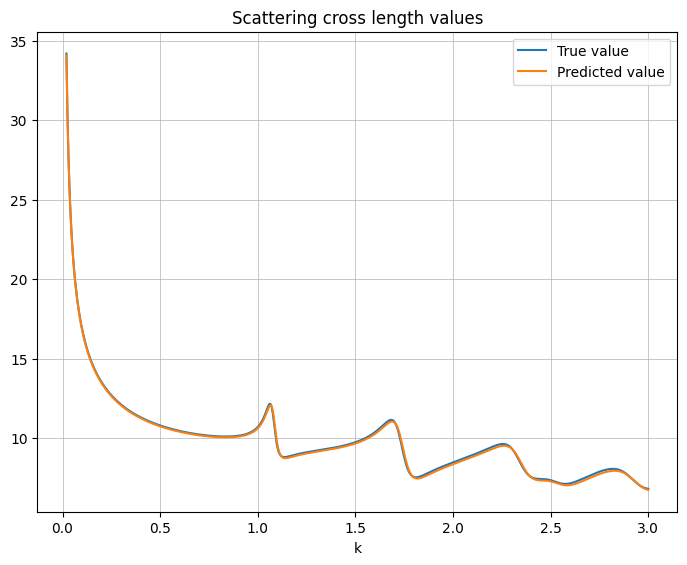

In [40]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(k, l_array[3], ls='-', label=f"True value")
axes.plot(k, cross_section, ls='-', label=f"Predicted value")
axes.set_title(f'Scattering cross length values')
axes.set_xlabel(f'k')
axes.legend(loc='upper right')
plt.grid(linestyle='-', linewidth=0.5)

In [41]:
import matplotlib

u = np.linspace(0, 2 * np.pi, 100)

x_real, y_real = 2.0 * np.cos(u), 2.0 * np.sin(u)
x_predicted, y_predicted = r * np.cos(u), r * np.sin(u)

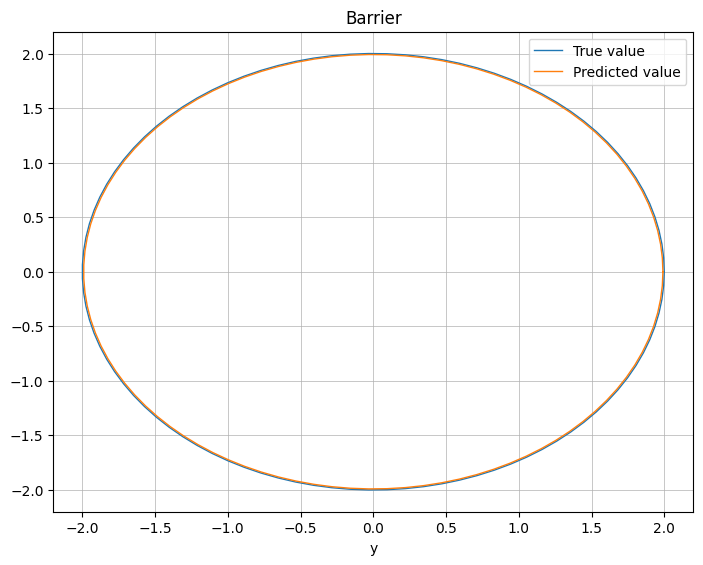

In [42]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(x_real, y_real, ls='-', lw=1.0, label=f"True value")
axes.plot(x_predicted, y_predicted, ls='-', lw=1.0, label=f"Predicted value")
axes.set_title(f'Barrier')
axes.set_xlabel(f'x')
axes.set_xlabel(f'y')
axes.legend(loc='upper right')
plt.grid(linestyle='-', linewidth=0.5)

In [43]:
input_size = 603
output_size = 2
rule_1 = max(input_size, output_size)
rule_2 = int(2/3 * input_size + output_size)
rule_3 = min(2 * input_size - 1, input_size + input_size // 3)
hidden_neurons = min(rule_1, rule_2, rule_3)

hidden_neurons

404